In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r"../crime_data_chicago.csv"
crime_chic = pd.read_csv(file)

In [3]:
crime_chic.shape

(2278726, 23)

In [4]:
crime_chic.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [5]:
# Starting the indexing from 1 so it can suffice for serial number
crime_chic.index += 1 

In [6]:
crime_chic.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
crime_chic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 1 to 2278726
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [8]:
#dropping the 'Unnamed:0' column
crime_chic = crime_chic.drop(columns=['Unnamed: 0']) #, axis = 1, inplace = True)

In [9]:
crime_chic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 1 to 2278726
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [10]:
crime_chic.isna().sum()

ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [11]:
crime_chic = crime_chic.dropna()

In [12]:
crime_chic.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [13]:
#Checking for duplicates in the 'Case Number' column
crime_chic['Case Number'].duplicated().sum()

46

OBSERVATION: The ID has no duplicates and will be used as a reference.

#Viewing the list of Case Number duplicates
CaseNumber_duplicate

In [14]:
#Checking for duplicates in the 'ID' column
crime_chic['ID'].duplicated().sum()

0

OBSERVATION: There incidents with the same 'Case number'. These incident are all homicidal in nature, described as first degree murder, have the same 'IUCR' - 0110 and 'FBI code' - 01A

To this effect the column 'Case Number' will be dropped so each incident can be referenced with its 'ID'

In [15]:
#Dropping the 'Case number' column
crime_chic.drop(columns=['Case Number'], inplace=True)

In [16]:
crime_chic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070581 entries, 1 to 2278726
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Updated On            object 
 18  Latitude              float64
 19  Longitude             float64
 20  Location              object 
dtypes: bool(2), float64(7), int64(3), object(9)
memory usage: 319.9+ MB


In [17]:
def missing_value_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean().reset_index()
    missing_percentage.columns = ['Column', 'Missing Percentage']

#Converting the proportion to percentage
    missing_percentage['Missing Percentage'] *= 100

    return missing_percentage


In [18]:
missing_value_percentage(crime_chic)

,Column,Missing Percentage
0,ID,0.0
1,Date,0.0
2,Block,0.0
3,IUCR,0.0
4,Primary Type,0.0
5,Description,0.0
6,Location Description,0.0
7,Arrest,0.0
8,Domestic,0.0
9,Beat,0.0


OBSERVATION: Going by the percentage of missing values, it is safe to say that there negligible as it is very minimal.

Further columns will be dropped as they aren't neccesarilly needed in our analysis. They are:
1. 'Ward' and 'Community Area' : these two columns plays a less significant role in our analysis since have the 'Location'. if such information is needed, it can easily be traced to the 'District' and from there the we can locate the 'Ward' and 'Community Area' via a map or the district data. In order words, the 'District' mothered the the Ward and 'Community Area'.
2. 'X and Y Coordinates' : these two column will give us location of the crime, same as what the 'Location' column will give us.
3. 'Latitute' and 'Longitude' : these two columns makes up the 'Location' column with the format - (Latitude, longitude).


In [19]:
#Dropping further columns
#crime_chic.drop(columns=['Ward','Community Area','X Coordinate', 'Y Coordinate'], axis = 1, inplace = True)

In [20]:
#Changing the column 'ID' header to 'Case ID'
crime_chic.rename(columns={'ID': 'Case ID'}, inplace=True, errors='raise')

In [21]:
crime_chic.head(5)

,Case ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,6407111,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
2,11398199,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
3,5488785,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
4,11389116,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
5,12420431,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [22]:
crime_chic.columns

Index(['Case ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [23]:
crime_chic.shape

(2070581, 21)

In [24]:
crime_chic.isna().sum()

Case ID                 0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [25]:
crime_chic.District.unique()

array([ 4., 17., 11., 12., 15., 25., 14.,  8.,  6.,  2., 19.,  1.,  7.,
       20., 18.,  3.,  9., 22.,  5., 16., 10., 24., 31.])

In [26]:
# district 4 location values
crime_chic.groupby('District').get_group(4)[['Location']]

,Location
1,"(41.739979622, -87.555120042)"
2,"(41.726922145, -87.599746995)"
22,"(41.653220991, -87.54591594)"
26,"(41.752607015, -87.565034748)"
43,"(41.754533775, -87.565074073)"
...,...
2278535,"(41.747483166, -87.561314066)"
2278561,"(41.747961169, -87.576651771)"
2278654,"(41.725766223, -87.600518444)"
2278717,"(41.73327429, -87.55133578)"


In [27]:
# district 10 location values
crime_chic.groupby('District').get_group(10)[['Location']]

,Location
84,"(41.854498094, -87.723580391)"
102,"(41.852650452, -87.71624588)"
118,"(41.837823658, -87.729239549)"
126,"(41.847609583, -87.711222061)"
149,"(41.854564542, -87.712421035)"
...,...
2278619,"(41.851321987, -87.699073615)"
2278657,"(41.862011728, -87.69378445)"
2278671,"(41.858194929, -87.720032279)"
2278673,"(41.834442083, -87.721858991)"


In [28]:
#crime_chic.tail(2278659:2278668)
crime_chic.iloc[2278659:2278664]

,Case ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


In [29]:
missing_rows = crime_chic[crime_chic['District'].isnull()]

In [30]:
missing_rows

,Case ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


In [31]:
#Filling the 'nan' value in the 'District' column with '0'
crime_chic['District'] = crime_chic['District'].fillna(0)

In [32]:
crime_chic.District.unique()

array([ 4., 17., 11., 12., 15., 25., 14.,  8.,  6.,  2., 19.,  1.,  7.,
       20., 18.,  3.,  9., 22.,  5., 16., 10., 24., 31.])

In [33]:
#Filling the 'nan' value in the 'Location Description' column with 'Unknown'
crime_chic['Location Description'] = crime_chic['Location Description'].fillna('Unknown')

In [34]:
#first_missing_index = df['column_name'].index[df['column_name'].isnull()].tolist()[0]

In [35]:
crime_chic['Location'] = crime_chic.groupby('District')['Location'].transform(lambda x: x.fillna(x.mode()))

In [36]:
crime_chic.shape

(2070581, 21)

In [37]:
# creating a column for months

from datetime import datetime

def extract_and_map_month(date):
    # ensure the input is in datetime format
    # 07/26/2008 02:30:00 PM
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')

    month_names = date_column.dt.month_name()

    return month_names

In [38]:
crime_chic['Month'] = extract_and_map_month(crime_chic['Date'])

In [39]:
# creating a column for seasons

def create_seasons_column(date_column):
    """
    Creates a new column representing seasons based on the months in a datetime column.

    Parameters:
    - date_column: Pandas Series, representing a datetime feature

    Returns:
    - Pandas Series containing the corresponding season names
    """
    # Ensure the input is in datetime format
    date_column = pd.to_datetime(date_column, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

    # Define a mapping of month to season
    month_to_season = {
        1: 'Winter', 2: 'Winter', 3: 'Spring',
        4: 'Spring', 5: 'Spring', 6: 'Summer',
        7: 'Summer', 8: 'Summer', 9: 'Autumn',
        10: 'Autumn', 11: 'Autumn', 12: 'Winter'
    }

    # Extract the month and map to season
    seasons_column = date_column.dt.month.map(month_to_season)

    return seasons_column

In [40]:
crime_chic['Seasons'] = create_seasons_column(crime_chic['Date'])

In [41]:
crime_chic.head()

,Case ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Seasons
1,6407111,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,...,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",July,Summer
2,11398199,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,...,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",July,Summer
3,5488785,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,...,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",April,Spring
4,11389116,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,...,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",July,Summer
5,12420431,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,...,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",July,Summer


In [42]:
crime_chic['Date'] = pd.to_datetime(crime_chic['Date'])

In [43]:
# Extract day, month, year, and time into new columns
crime_chic['day'] = crime_chic['Date'].dt.day.astype(int)
#df['month'] = df['Date'].dt.strftime('%B') #extract full month name
crime_chic['year'] = crime_chic['Date'].dt.year.astype(int)
crime_chic['time'] = crime_chic['Date'].dt.strftime('%H:%M:%S')

In [44]:
# Extract the day of the week
crime_chic['day_of_week'] = crime_chic['Date'].dt.day_name()

In [45]:
crime_chic.columns

Index(['Case ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'Month',
       'Seasons', 'day', 'year', 'time', 'day_of_week'],
      dtype='object')

In [46]:
crime_chic.head()

,Case ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Updated On,Latitude,Longitude,Location,Month,Seasons,day,year,time,day_of_week
1,6407111,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,...,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",July,Summer,26,2008,14:30:00,Saturday
2,11398199,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,...,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",July,Summer,31,2018,10:57:00,Tuesday
3,5488785,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,...,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",April,Spring,27,2007,10:30:00,Friday
4,11389116,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,...,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",July,Summer,23,2018,08:55:00,Monday
5,12420431,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,...,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",July,Summer,11,2021,06:40:00,Sunday


In [47]:
# check the distribution of the crime
crime_distribution  = crime_chic['Primary Type'].value_counts()

In [48]:
crime_distribution

THEFT                                436851
BATTERY                              381760
CRIMINAL DAMAGE                      237244
NARCOTICS                            199506
ASSAULT                              135223
OTHER OFFENSE                        128772
BURGLARY                             114981
MOTOR VEHICLE THEFT                   95269
DECEPTIVE PRACTICE                    87658
ROBBERY                               78447
CRIMINAL TRESPASS                     57954
WEAPONS VIOLATION                     28470
PROSTITUTION                          18260
OFFENSE INVOLVING CHILDREN            14430
PUBLIC PEACE VIOLATION                14396
SEX OFFENSE                            7534
CRIM SEXUAL ASSAULT                    7299
INTERFERENCE WITH PUBLIC OFFICER       5298
GAMBLING                               3991
LIQUOR LAW VIOLATION                   3839
ARSON                                  3500
HOMICIDE                               3484
KIDNAPPING                      

SUMMARY STATISTICS

In [50]:
crime_chic.describe()

,Case ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,day,year
count,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06
mean,7.322924e+06,1.182230e+03,1.127909e+01,2.271360e+01,3.753332e+01,1.164572e+06,1.885610e+06,2.010366e+03,4.184171e+01,-8.767161e+01,1.565439e+01,2.010366e+03
std,3.178661e+06,7.018246e+02,6.940316e+00,1.382901e+01,2.152122e+01,1.680152e+04,3.217971e+04,5.699301e+00,8.853018e-02,6.094413e-02,8.834701e+00,5.699301e+00
min,6.460000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,2.001000e+03
25%,4.507528e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152929e+06,1.858883e+06,2.005000e+03,4.176819e+01,-8.771391e+01,8.000000e+00,2.005000e+03
50%,7.337528e+06,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166069e+06,1.890598e+06,2.010000e+03,4.185545e+01,-8.766594e+01,1.600000e+01,2.010000e+03
75%,1.012066e+07,1.724000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909088e+06,2.015000e+03,4.190639e+01,-8.762820e+01,2.300000e+01,2.015000e+03
max,1.278013e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.022000e+03,4.202267e+01,-8.752453e+01,3.100000e+01,2.022000e+03


In [51]:
crime_chic.head()

,Case ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Updated On,Latitude,Longitude,Location,Month,Seasons,day,year,time,day_of_week
1,6407111,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,...,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",July,Summer,26,2008,14:30:00,Saturday
2,11398199,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,...,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",July,Summer,31,2018,10:57:00,Tuesday
3,5488785,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,...,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",April,Spring,27,2007,10:30:00,Friday
4,11389116,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,...,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",July,Summer,23,2018,08:55:00,Monday
5,12420431,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,...,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",July,Summer,11,2021,06:40:00,Sunday


TEMPORAL ANALYSIS

Yearly distribution

In [52]:
# Analyze distribution of crimes over time
yearly_distribution = crime_chic['Date'].dt.year.value_counts().sort_index()

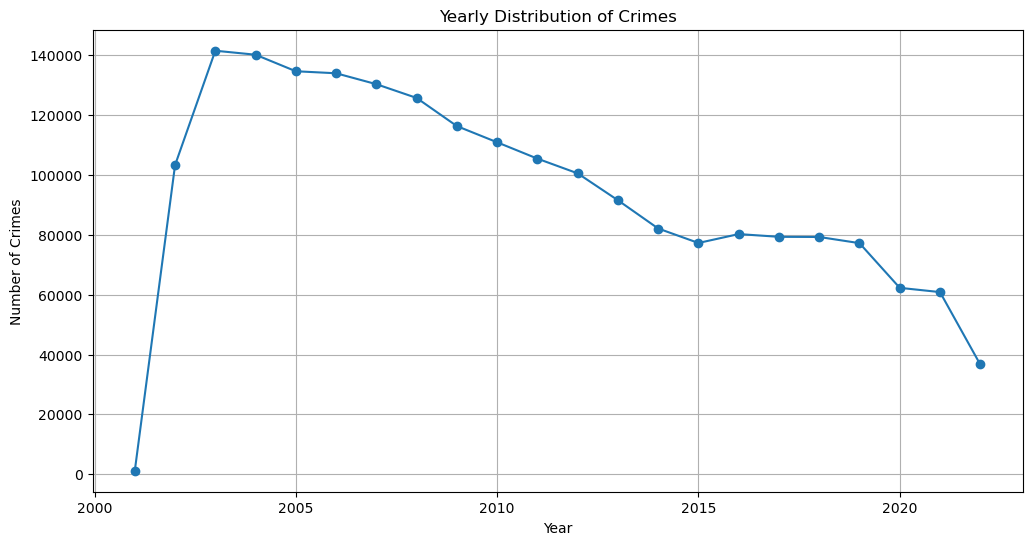

In [53]:
# Plot yearly distribution
plt.figure(figsize=(12, 6))
yearly_distribution.plot(kind='line', marker='o', linestyle='-')
plt.title('Yearly Distribution of Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

Season distribution

In [54]:
seasonal_distribution = crime_chic.groupby('Seasons').size()

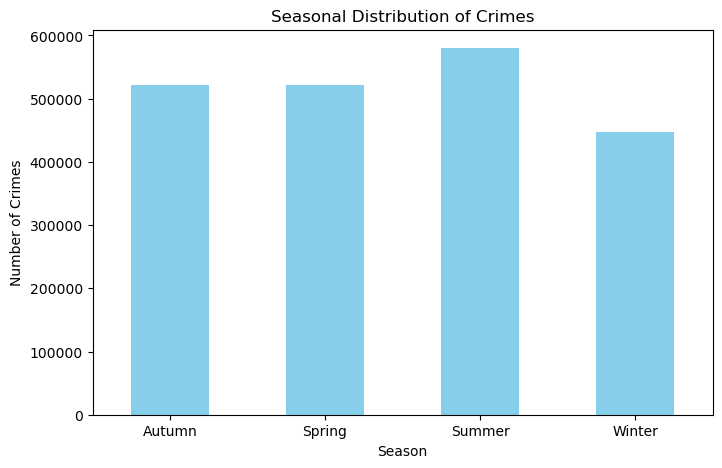

In [55]:
# Plot seasonal distribution
plt.figure(figsize=(8, 5))
seasonal_distribution.plot(kind='bar', color='skyblue')
plt.title('Seasonal Distribution of Crimes')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

In [56]:
years = sorted(crime_chic['Year'].unique())

In [57]:
sorted(crime_chic['Month'].unique())

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

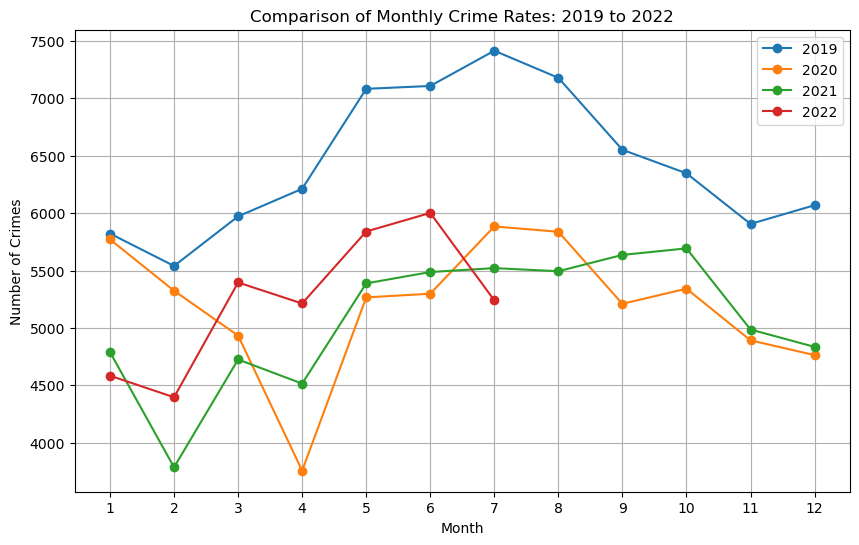

In [58]:
# Example: comparing crime rates between 2019 and 2020
crime_chic['Year'] = crime_chic['Date'].dt.year
crime_chic['Month'] = crime_chic['Date'].dt.month

# Filter data for 2019 to 2020
crime_data_2019 = crime_chic[crime_chic['Year'] == 2019]
crime_data_2020 = crime_chic[crime_chic['Year'] == 2020]
crime_data_2021 = crime_chic[crime_chic['Year'] == 2021]
crime_data_2022 = crime_chic[crime_chic['Year'] == 2022]

# Calculate total number of crimes for each month
monthly_crimes_2019 = crime_data_2019.groupby('Month').size()
monthly_crimes_2020 = crime_data_2020.groupby('Month').size()
monthly_crimes_2021 = crime_data_2021.groupby('Month').size()
monthly_crimes_2022 = crime_data_2022.groupby('Month').size()


# Plot comparison of crime rates between 2019 to 2020
plt.figure(figsize=(10, 6))
plt.plot(monthly_crimes_2019.index, monthly_crimes_2019.values, marker='o', label='2019')
plt.plot(monthly_crimes_2020.index, monthly_crimes_2020.values, marker='o', label='2020')
plt.plot(monthly_crimes_2021.index, monthly_crimes_2021.values, marker='o', label='2021')
plt.plot(monthly_crimes_2022.index, monthly_crimes_2022.values, marker='o', label='2022')

plt.title('Comparison of Monthly Crime Rates: 2019 to 2022')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()


CRIME TYPES

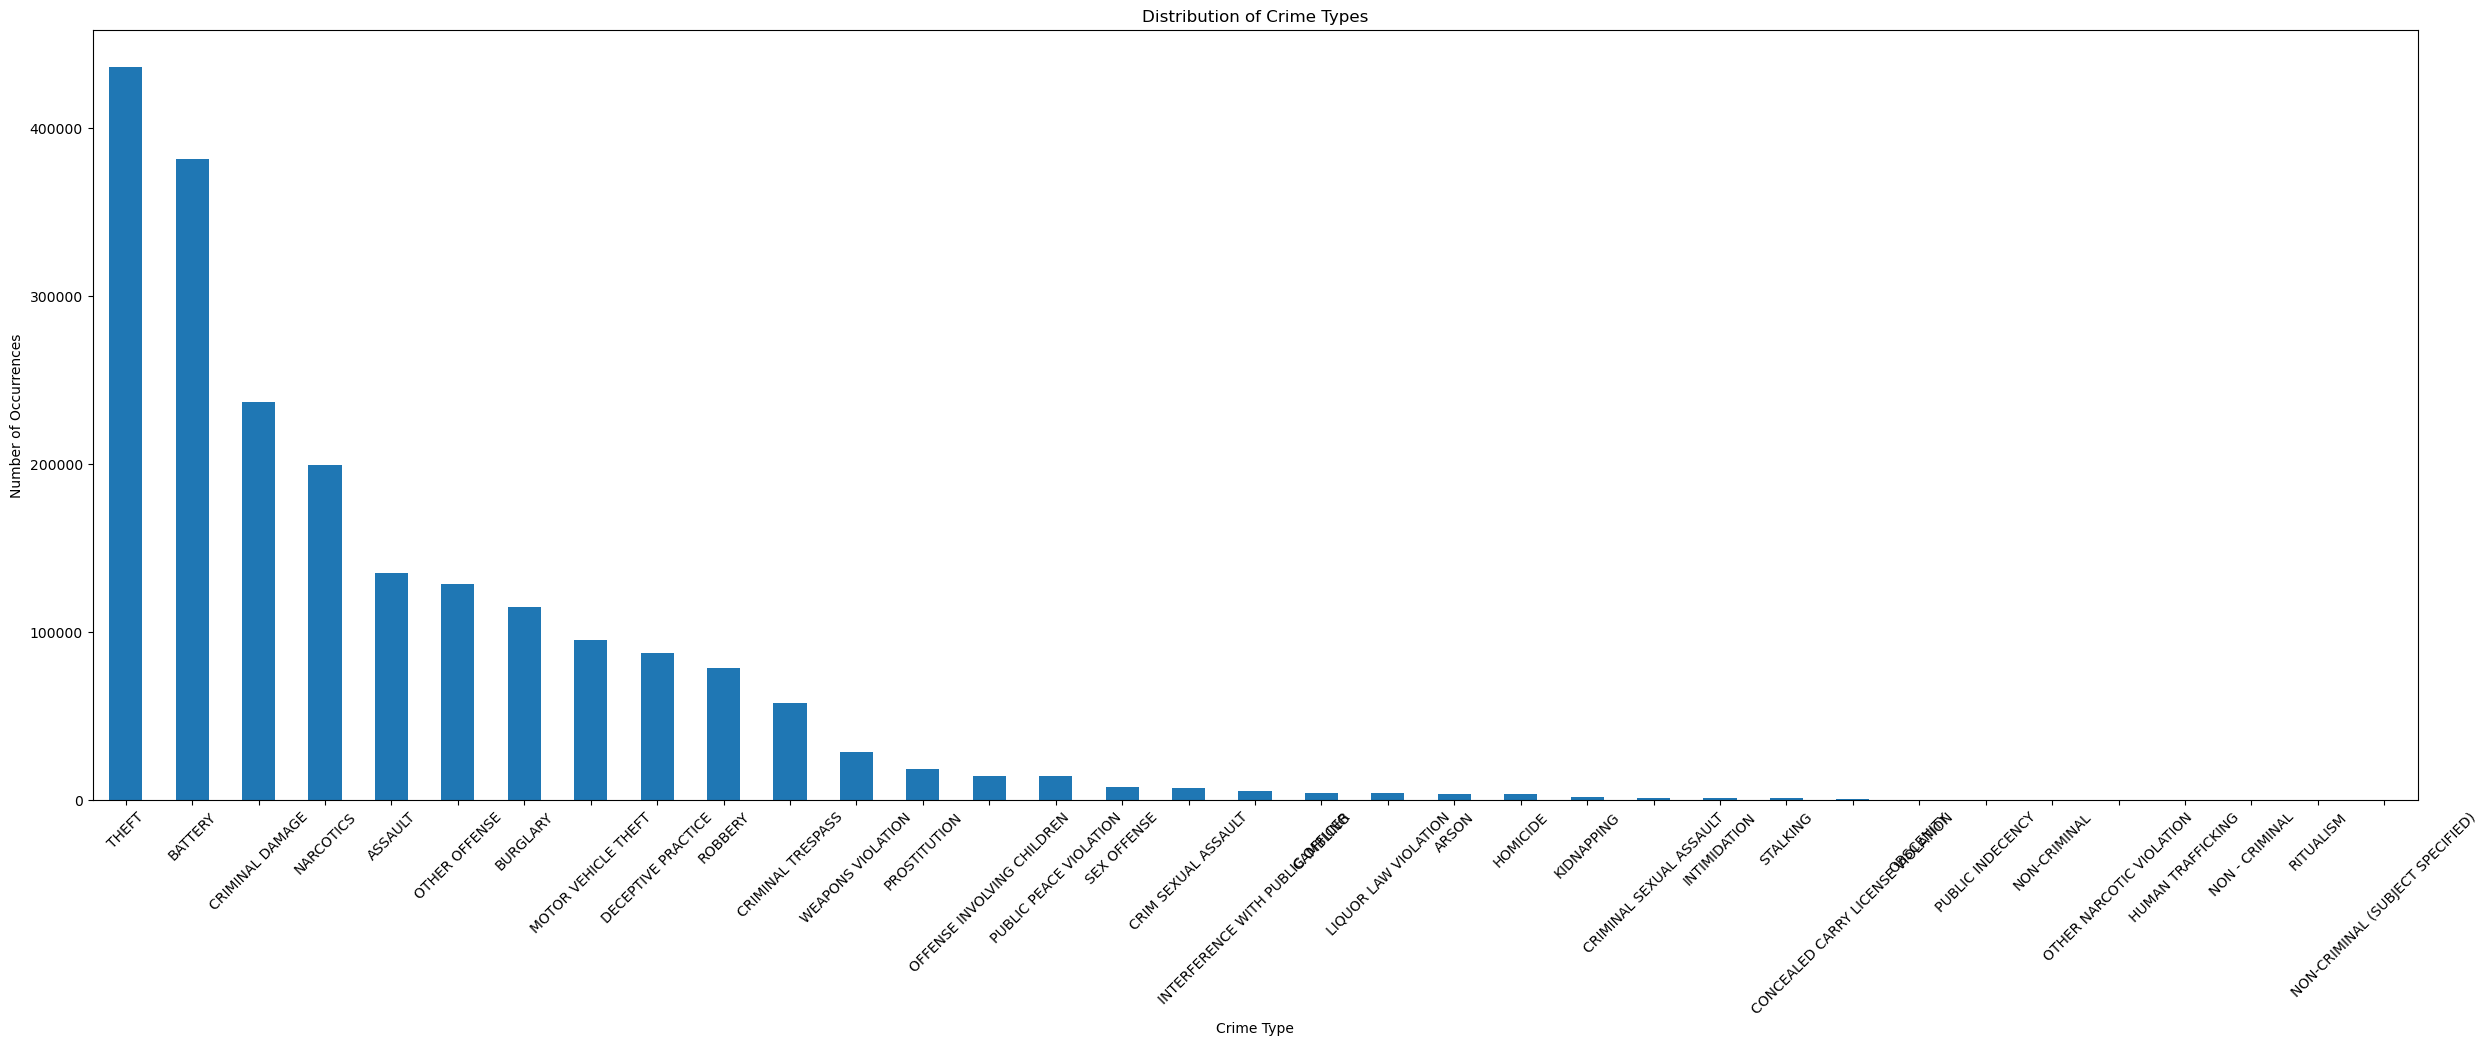

In [91]:
# Plot distribution of crime types
crime_distribution.plot(kind='bar', figsize=(30, 10))
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Group data by crime type and calculate sum of arrests
arrests_by_crime = crime_chic.groupby('Primary Type')['Arrest'].sum()

In [79]:
# Find the crime with the most arrests
most_arrested_crime = arrests_by_crime.idxmax()
max_arrests = arrests_by_crime.max()

In [80]:
most_arrested_crime

'NARCOTICS'

In [73]:
max_arrests

198288

RELATIONSHIP BETWEEN VARIABLES

In [85]:
# Calculate correlations
correlation_matrix = crime_chic.corr()

C:\Users\me\AppData\Local\Temp\ipykernel_4932\246092313.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crime_chic.corr()


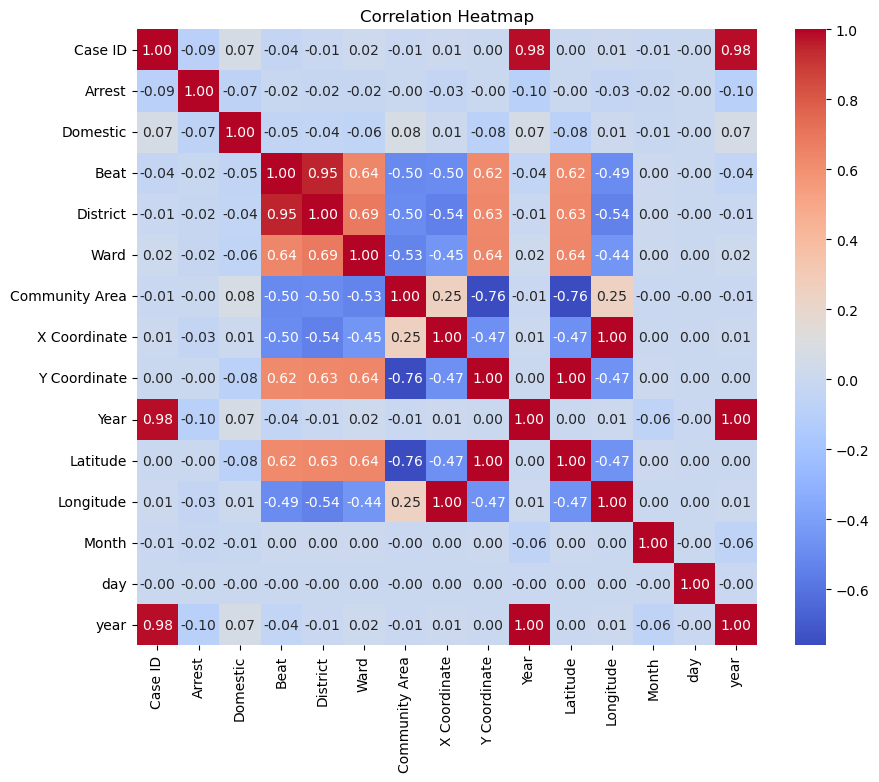

In [86]:
# Visualize correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

SEASONAL PATTERNS

In [ ]:
# Plot seasonal patterns
seasonal_crime_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Crime Rate by Season')
plt.xlabel('Season')
plt.ylabel('Average Crime Rate')
plt.show()